# На гребне волны

# Характеристики скалярных уравнений

На прошлом занятии мы обсуждали общую формулировку законов сохранения и в качестве примеров рассмотрели уравнение Бюргерса и уравнение транспортных потоков Лайтхилла-Уитхама-Ричардса ([Lighthill-Whitham-Richards](http://en.wikipedia.org/wiki/Macroscopic_traffic_flow_model)). Поскольку указанные уравнения являются гипреболическими, то для них справеливы все свойства, которыми обладают уравнения такого класса. О них мы говорили на занятиях [второго модуля](http://nbviewer.ipython.org/github/numerical-mooc/ru-numerical-mooc/blob/master/lessons/02_spacetime/02_01_1DConvection.ipynb). Вспомним их и добавим еще парочку.

Рассмотрим уравнение

\begin{equation}
\frac{\partial \bf u}{\partial t} + \frac{\partial}{\partial x}(\bf F( \bf u))=0
\end{equation}

1. Решение можно записать в виде  ${\bf u}(\xi)$ где $\xi = x/t$ автомодельная переменная.
2. Это, в свою очередь, означает, что в областях, где решение гладкое, оно удовлетворяет уравнению
\begin{equation}
  \left( \frac{\partial {\bf F}}{\partial {\bf u}} - \xi \textrm{E} \right) \partial_{\xi} {\bf u} = 0.
\end{equation}
3. То есть, автомодельная переменная соответствует собственному значению $\lambda^{(p)}$ Якобиана $\partial {\bf F} / \partial {\bf u}$, а $\partial_{\xi} {\bf u}$ — собственный вектор
4. В случае, если существует решение на разрыве, оно удовлетворяет соотношению Рэнкина-Гюгонио
\begin{equation}
  {\bf F}({\bf u}_r) - {\bf F}({\bf u}_l) = s \left( {\bf u}_r - {\bf u}_l \right)
\end{equation}
где $s$ скорость скачка

## Одномерный случай

В одномерном случае Якобиан вырождается в одну производную $F'(u)$. Например, для уравнения Бюргерса

\begin{equation}
  \frac{\partial u}{\partial t} + \frac{\partial \left( \tfrac{1}{2} u^2 \right)}{\partial x} = 0
\end{equation}

имеем  $F'(u) = u$, и скорости характеристик совпадают со значениями переменной.

Мы знаем, что решенеи вдоль характеристик остается постоянным. Давайте нарисуем характеристики, и посмотрим, как определяется решение.

In [46]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [47]:
def df_burgers(u):
    """The derivative of the flux function, here defined for Burger's equation."""
    
    return u

In [48]:
def plot_characteristics(df, ul, ur):
    """Plot the characteristic lines for the initial data of a scalar Riemann problem."""
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-', lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = df(ul)
    slope_r = df(ur)
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    x_end_points_l = x_start_points_l + slope_l
    x_end_points_r = x_start_points_r + slope_r
    
    for xs, xe in zip(x_start_points_l, x_end_points_l):
        ax2.plot([xs, xe], [0.0, 1.0], 'b-')
    for xs, xe in zip(x_start_points_r, x_end_points_r):
        ax2.plot([xs, xe], [0.0, 1.0], 'g-')
        
    x_fill = [x_end_points_l[-1], x_start_points_l[-1], x_end_points_r[0]]
    t_fill = [1.0, 0.0, 1.0]
    ax2.fill_between(x_fill, t_fill, 1.0, facecolor = 'red', alpha = 0.5)
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

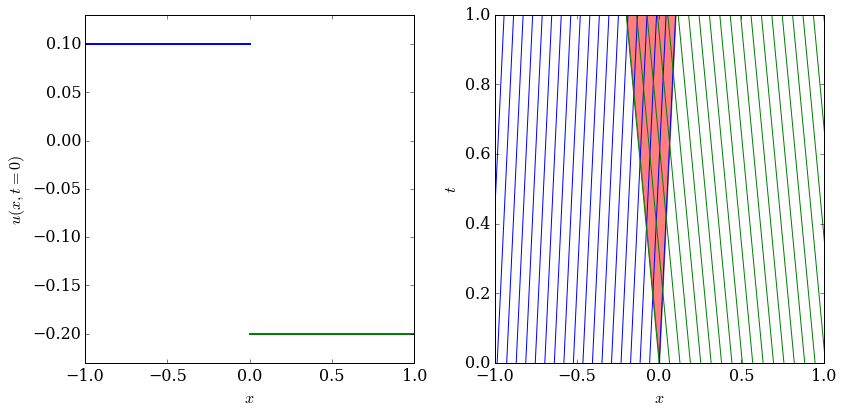

In [49]:
plot_characteristics(df_burgers, 0.1, -0.2)

В красной области характеристики пересекаются, и решение не определено, так как можно взять значение как справа, так и слева.

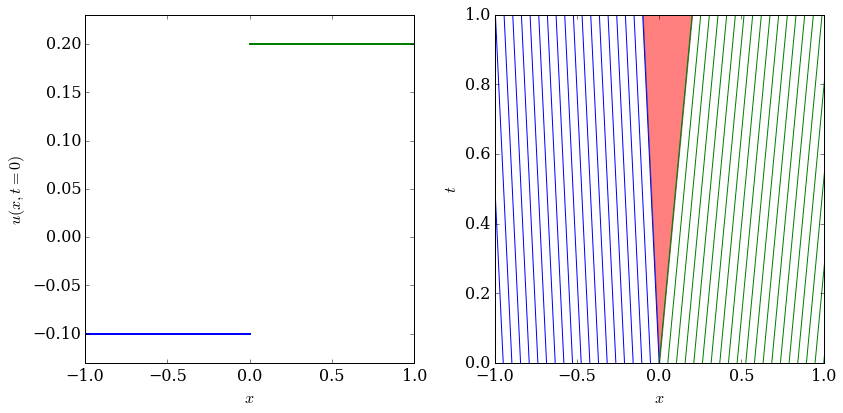

In [50]:
plot_characteristics(df_burgers, -0.1, 0.2)

Другой случай — характеристики расходятся. В этом случае для получения решения в заштрихованной области не хватает начальных данных.

Можно увидеть, как меняется поле характеристик в зависимости от начальных условий.

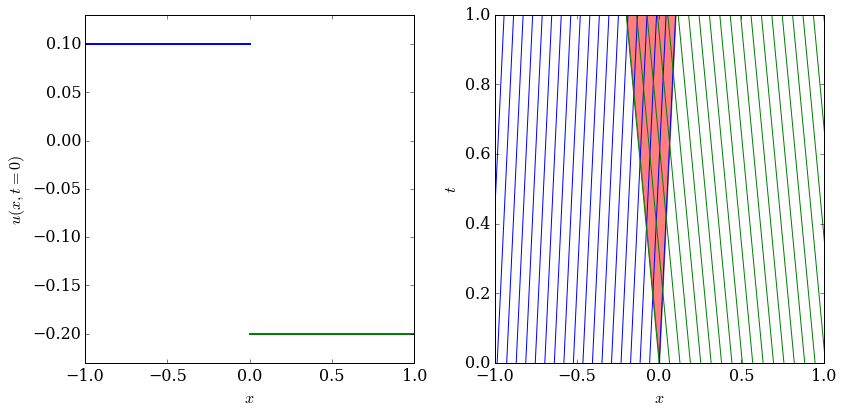

In [51]:
from ipywidgets import interactive, FloatSlider
def interactive_characteristics(ul, ur):
    return plot_characteristics(df_burgers, ul, ur)
interactive(interactive_characteristics, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.2))

### Упражнение

Попробуйте проделать то же самое с уравненим транспортных потоков: 
\begin{equation}\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0\end{equation}
\begin{equation} F = \rho u_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right).
\end{equation}
\begin{equation}u_{\rm wave} = \frac{\partial F}{\partial \rho} = u_{\rm max} \left( 1-2\frac{\rho}{\rho_{\rm max}} \right).\end{equation}

## Скачок

При пересечении характеристик, решением будет являться скачок, удовлетворяющий соотношениям Рэнкина-Гюгонио.

Для уравнения Бюргерса решение можно выписать в явном виде.

\begin{align}
  &&  F\left(u_r\right) -  F\left(u_l\right) & = s \left( u_r - u_l \right) \\
  \implies && \frac{1}{2} \left( u_r^2 - u_l^2 \right) & = s \left( u_r - u_l \right) \\
  \implies && s & = \frac{1}{2} \frac{ u_r^2 - u_l^2 }{ u_r - u_l } \\
  && & = \frac{u_r + u_l}{2}.
\end{align}

Зная скорость распространения скачка, можно в записать _решение задачи Римана для уравнения Бюргерса в случае скачка_:

\begin{equation}
  u_l > u_r \quad \implies \quad u(x, t) = \begin{cases} u_l & x < s t \\ u_r & x > s t \end{cases}
\end{equation}

где $s = (u_r + u_l) / 2$.

In [52]:
def plot_shock_burgers(ul, ur):
    """Plot the characteristic lines for the shock solution to Burger's equation."""
    
    assert(ul > ur)
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-',lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ul
    slope_r = ur
    s = 0.5 * (ur + ul)
    ax2.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    t_end_points_l = np.ones_like(x_start_points_l)
    t_end_points_r = np.ones_like(x_start_points_r)
    
    # Look for intersections
    t_end_points_l = np.minimum(t_end_points_l, x_start_points_l / (s - slope_l))
    t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))
    x_end_points_l = x_start_points_l + slope_l * t_end_points_l
    x_end_points_r = x_start_points_r + slope_r * t_end_points_r
    
    for xs, xe, te in zip(x_start_points_l, x_end_points_l, t_end_points_l):
        ax2.plot([xs, xe], [0.0, te], 'b-')
    for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
        ax2.plot([xs, xe], [0.0, te], 'g-')
    
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

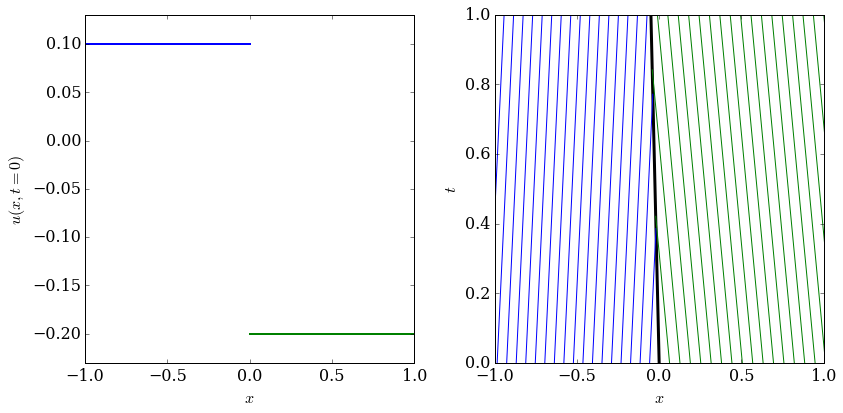

In [53]:
interactive(plot_shock_burgers, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.2))

### Упражнение

Попробуйте получить решение в случае скачка для уравнения транспортных потоков

## Волна разрежения

Если характеристики не пересекаются, то реализуется случай воны разреженеия.

Собственным числом матрицы Якоби $\partial {\bf f} / \partial {\bf u}$ является  $\xi = x/t$. В случае уравнения Бюргерса это означает, что  $\xi = u$.

Полученное соотношение справедливо и на разрыве — области на плоскости $x-t$, где характеристики не пересекаются. В таком случае решение на волне разрежения выглядит как

\begin{equation}
  u_l < u_r \quad \implies \quad u(x, t) = \begin{cases} u_l & x < \xi_l t \\ \frac{x}{t} & \xi_l t < x < \xi_r t \\ u_r & x > \xi_r t \end{cases}
\end{equation}

где края волны разрежения (их иногда называют "голова" и "хвост") соответствуют скоростям правой и левой характеристик. В случае уравнения Бюргерса они равны $\xi_l = u_l$ and $\xi_r = u_r$

In [54]:
def plot_rarefaction_burgers(ul, ur):
    """Plot the characteristic lines for the rarefaction solution to Burger's equation."""
    
    assert(ul < ur)
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-',lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ul
    slope_r = ur
    
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20)
    x_end_points_l = x_start_points_l + slope_l
    x_end_points_r = x_start_points_r + slope_r
    
    # Rarefaction wave
    xi_l = ul
    xi_r = ur
    xi = np.linspace(xi_l, xi_r, 7)
    x_end_rarefaction = xi
    
    for xs, xe in zip(x_start_points_l, x_end_points_l):
        ax2.plot([xs, xe], [0.0, 1.0], 'b-')
    for xs, xe in zip(x_start_points_r, x_end_points_r):
        ax2.plot([xs, xe], [0.0, 1.0], 'g-')
    for xe in x_end_rarefaction:
        ax2.plot([0.0, xe], [0.0, 1.0], 'r--')
    
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

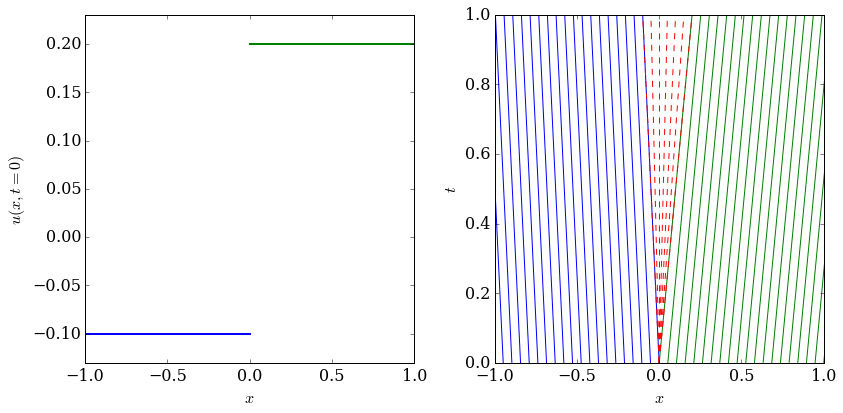

In [55]:
interactive(plot_rarefaction_burgers, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.2))

### Упражнение

Попробуйте получить решение в случае волны разрежения для уравнения транспортных потоков

## Решение задачи Римана

Для уравнения Бюргерса рассмотренные случаи полностью описывают решение задачи Римана о распаде произвольного разрыва. Если $u_l < u_r$ получаем волну разрежения, если $u_l > u_r$ — скачок. В случае равенства получим тривиальное решение (это нужно учесть в коде).

In [56]:
def plot_solution_burgers(ul, ur):
    """Plot the characteristic lines for the full solution to Burger's equation."""
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-',lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ul
    slope_r = ur
    
    if (ul <= ur):
        # Rarefaction case
        
        left_edge = np.min([-1.0, -1.0 - slope_l])
        right_edge = np.max([1.0, 1.0 - slope_r])
        x_start_points_l = np.linspace(left_edge, 0.0, 20)
        x_start_points_r = np.linspace(0.0, right_edge, 20)
        x_end_points_l = x_start_points_l + slope_l
        x_end_points_r = x_start_points_r + slope_r
    
        # Rarefaction wave
        xi_l = ul
        xi_r = ur
        xi = np.linspace(xi_l, xi_r, 7)
        x_end_rarefaction = xi
    
        for xs, xe in zip(x_start_points_l, x_end_points_l):
            ax2.plot([xs, xe], [0.0, 1.0], 'b-')
        for xs, xe in zip(x_start_points_r, x_end_points_r):
            ax2.plot([xs, xe], [0.0, 1.0], 'g-')
        for xe in x_end_rarefaction:
            ax2.plot([0.0, xe], [0.0, 1.0], 'r--')
    
    else:
        # Shock case
        s = 0.5 * (ur + ul)
        ax2.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
        left_edge = np.min([-1.0, -1.0 - slope_l])
        right_edge = np.max([1.0, 1.0 - slope_r])
        x_start_points_l = np.linspace(left_edge, 0.0, 20)
        x_start_points_r = np.linspace(0.0, right_edge, 20) 
        t_end_points_l = np.ones_like(x_start_points_l)
        t_end_points_r = np.ones_like(x_start_points_r)
    
        # Look for intersections
        t_end_points_l = np.minimum(t_end_points_l, x_start_points_l / (s - slope_l))
        t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))
        x_end_points_l = x_start_points_l + slope_l * t_end_points_l
        x_end_points_r = x_start_points_r + slope_r * t_end_points_r
    
        for xs, xe, te in zip(x_start_points_l, x_end_points_l, t_end_points_l):
            ax2.plot([xs, xe], [0.0, te], 'b-')
        for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
            ax2.plot([xs, xe], [0.0, te], 'g-')
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

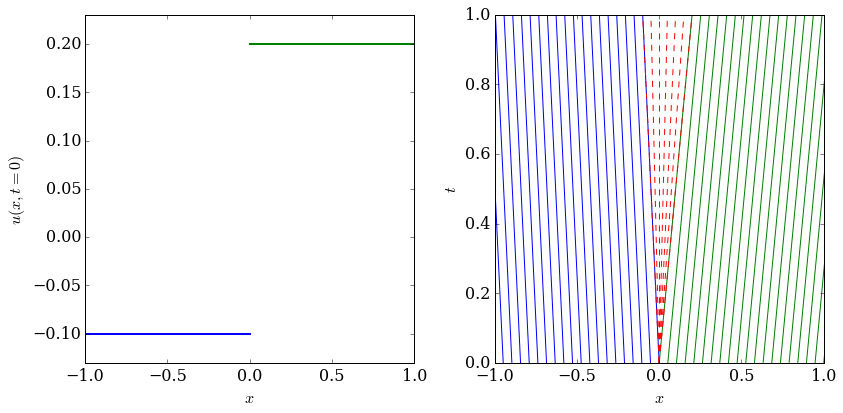

In [57]:
interactive(plot_solution_burgers, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.2))

### Упражнение

Получите решение задачи Римана для уравнения транспортныз потоков

In [58]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())